In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [54]:
train_dir = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Training"  # Training Dataset Path
test_dir = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Testing"    # Testing Dataset Path
img_size = (255, 255)  # Image size for resizing
batch_size = 32
num_classes = 4


In [55]:
# Data Augmentation: Rotate by 90° + Vertical Flip
# For training: using data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,       # smaller rotation range to avoid over-distortion
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.2
)



In [56]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [57]:
train_loader = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # one-hot encoded labels
)


Found 5712 images belonging to 4 classes.


In [58]:

test_loader = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # important for evaluation so predictions align with true labels
)

print("Dataset Loaded with Data Augmentation and Rescaling")



Found 1311 images belonging to 4 classes.
Dataset Loaded with Data Augmentation and Rescaling


In [59]:
categories = list(train_loader.class_indices.keys())


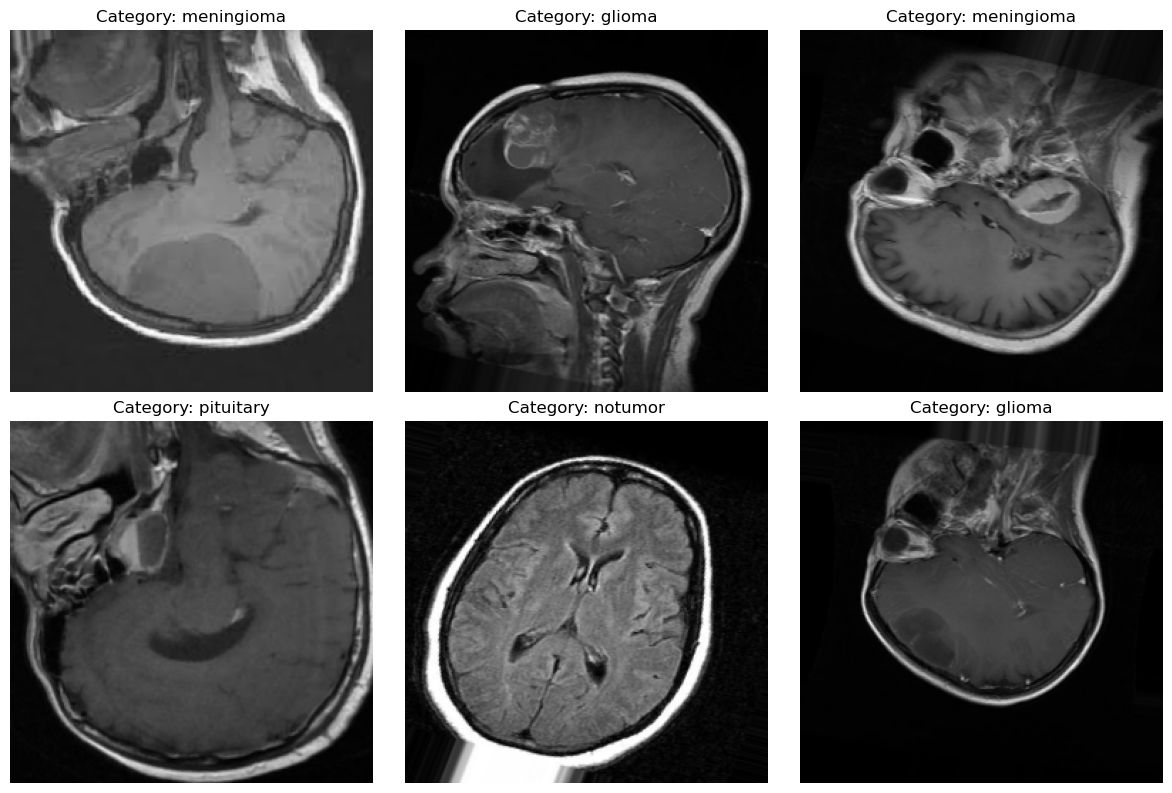

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Define categories using class_indices from the data generator
categories = list(train_loader.class_indices.keys())  # Extract class labels

# Load a batch of images from the training dataset
images, labels = next(train_loader)

# Plot 6 images
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    
    # Ensure images are correctly formatted for display
    plt.imshow(images[i])  # ImageDataGenerator outputs images in correct format
    
    # If labels are one-hot encoded, use np.argmax to get the class index
    label_index = np.argmax(labels[i])
    
    plt.title(f"Category: {categories[label_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


c:\Users\ujwal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


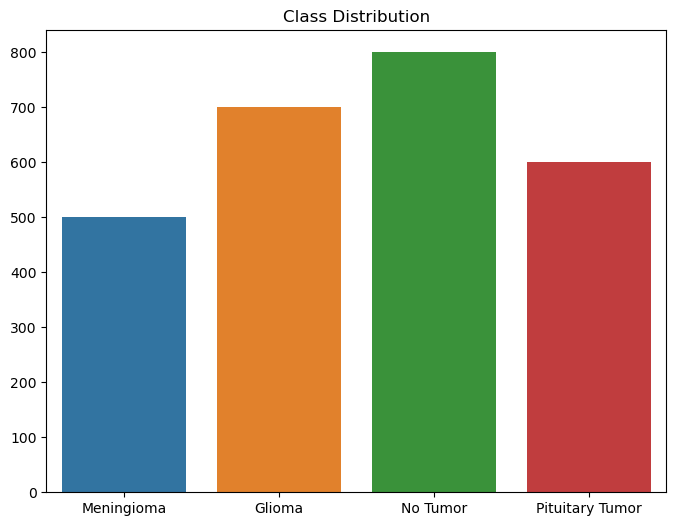

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. Class Distribution
labels = ['Meningioma', 'Glioma', 'No Tumor', 'Pituitary Tumor']
counts = [500, 700, 800, 600]
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts)
plt.title('Class Distribution')
plt.show()

Tumor Images


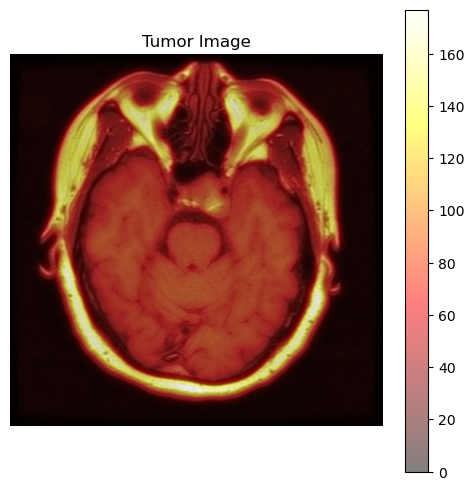

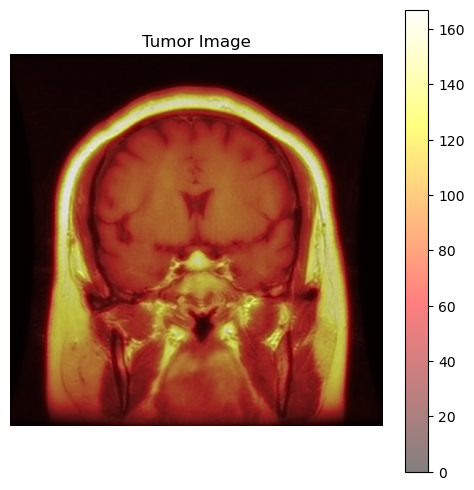

Non-Tumor Images


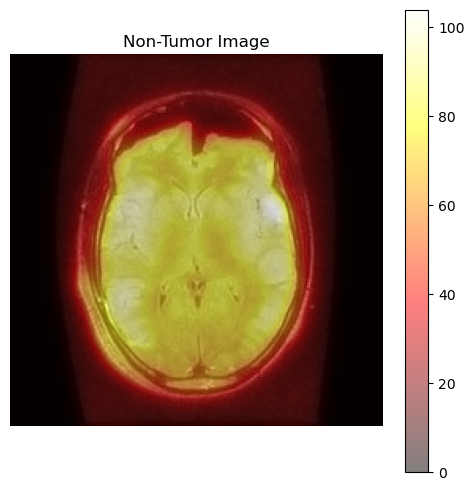

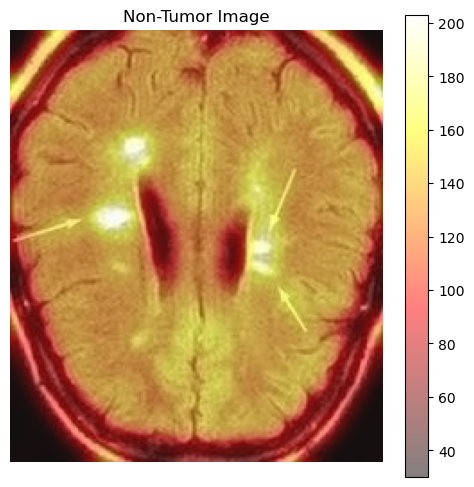

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

def plot_heatmap(image_path, title):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Could not read image {image_path}")
        return
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    
    # Generate heatmap using Gaussian filter
    heatmap = cv2.GaussianBlur(image, (35, 35), 0)
    plt.imshow(heatmap, cmap='hot', alpha=0.5)
    plt.colorbar()
    plt.show()

# Example directory paths (replace these with your dataset directories)
tumor_dir = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Testing\\pituitary"
nontumor_dir = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Testing\\notumor"

# Select random tumor and non-tumor images
tumor_images = random.sample(os.listdir(tumor_dir), 2)
nontumor_images = random.sample(os.listdir(nontumor_dir), 2)

print("Tumor Images")
for img in tumor_images:
    plot_heatmap(os.path.join(tumor_dir, img), title="Tumor Image")

print("Non-Tumor Images")
for img in nontumor_images:
    plot_heatmap(os.path.join(nontumor_dir, img), title="Non-Tumor Image")


In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build 2D CNN Model for 4-Class Classification
def build_cnn_model():
    model = tf.keras.models.Sequential()
    
    # First Convolutional Block
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    # Second Convolutional Block
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    # Third Convolutional Block
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    # Flatten and Fully Connected Layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))  # 4-class output
    
    # Compile the model for one-hot encoded labels
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
# Model Summary
model = build_cnn_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(
    train_loader,
    epochs=100,
    validation_data=test_loader,
    steps_per_epoch=len(train_loader),
    validation_steps=len(test_loader)
)


c:\Users\ujwal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.4862 - loss: 1.1832 - val_accuracy: 0.6133 - val_loss: 0.9662
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.6674 - loss: 0.7990 - val_accuracy: 0.5141 - val_loss: 1.3482
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7098 - loss: 0.7081 - val_accuracy: 0.7208 - val_loss: 0.7515
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7572 - loss: 0.6357 - val_accuracy: 0.6712 - val_loss: 0.7853
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.7609 - loss: 0.6134 - val_accuracy: 0.7704 - val_loss: 0.5826
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.7853 - loss: 0.5585 - val_accuracy: 0.7757 - val_loss: 0.5782
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7842 - loss: 0.5538 - val_accuracy: 0.8124 - val_loss: 0.4911
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.8100 - loss: 0.4855 - 

In [66]:
test_loss, test_accuracy = model.evaluate(test_loader)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.9440 - loss: 0.1381
Test Accuracy: 96.72%
Test Loss: 0.0836


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       1.00      0.90      0.95       300
  meningioma       0.91      0.97      0.94       306
     notumor       0.98      1.00      0.99       405
   pituitary       0.98      0.99      0.99       300

    accuracy                           0.97      1311
   macro avg       0.97      0.96      0.97      1311
weighted avg       0.97      0.97      0.97      1311



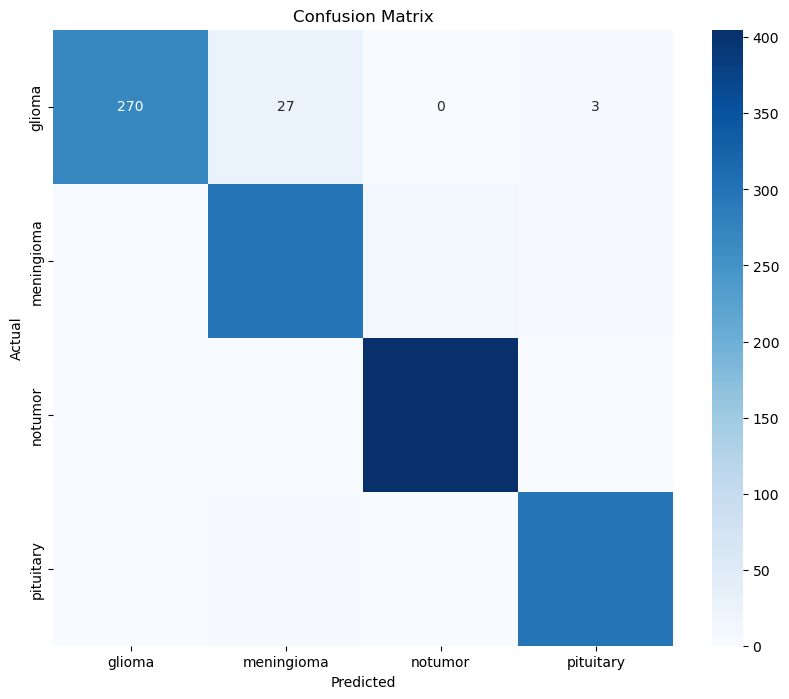

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get Predictions
y_pred = model.predict(test_loader)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(test_loader.classes, y_pred_classes, target_names=test_loader.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(test_loader.classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_loader.class_indices.keys(), 
            yticklabels=test_loader.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [69]:
# Print Model Accuracy
final_accuracy = max(history.history['accuracy'])
print(f"Model Training Accuracy: {final_accuracy * 100:.2f}%")

# Print Validation Accuracy
final_val_accuracy = max(history.history['val_accuracy'])
print(f"Model Validation Accuracy: {final_val_accuracy * 100:.2f}%")

# Print Model Loss
final_loss = min(history.history['loss'])
print(f"Model Training Loss: {final_loss:.4f}")

# Print Validation Loss
final_val_loss = min(history.history['val_loss'])
print(f"Model Validation Loss: {final_val_loss:.4f}")


Model Training Accuracy: 96.73%
Model Validation Accuracy: 97.71%
Model Training Loss: 0.0914
Model Validation Loss: 0.0615


In [70]:
import plotly.graph_objects as go

epochs = list(range(1, len(history.history['accuracy']) + 1))

fig = go.Figure()
fig.add_trace(go.Scatter(x=epochs, y=history.history['accuracy'], mode='lines+markers', name='Training Accuracy', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=epochs, y=history.history['val_accuracy'], mode='lines+markers', name='Validation Accuracy', line=dict(color='green')))
fig.update_layout(title='Interactive Model Accuracy', xaxis_title='Epochs', yaxis_title='Accuracy')
fig.show()


In [71]:
import plotly.graph_objects as go

# Prepare Data
epochs = list(range(1, len(history.history['loss']) + 1))
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create Interactive Plot
fig = go.Figure()

# Training Loss Curve
fig.add_trace(go.Scatter(
    x=epochs, y=train_loss,
    mode='lines+markers',
    name='Training Loss',
    line=dict(color='red'),
    marker=dict(symbol='circle')
))

# Validation Loss Curve
fig.add_trace(go.Scatter(
    x=epochs, y=val_loss,
    mode='lines+markers',
    name='Validation Loss',
    line=dict(color='orange'),
    marker=dict(symbol='diamond')
))

# Graph Layout
fig.update_layout(
    title="Interactive Model Loss Graph",
    xaxis_title='Epochs',
    yaxis_title='Loss',
    hovermode='x unified',
    template='plotly_dark'
)

# Show Graph
fig.show()


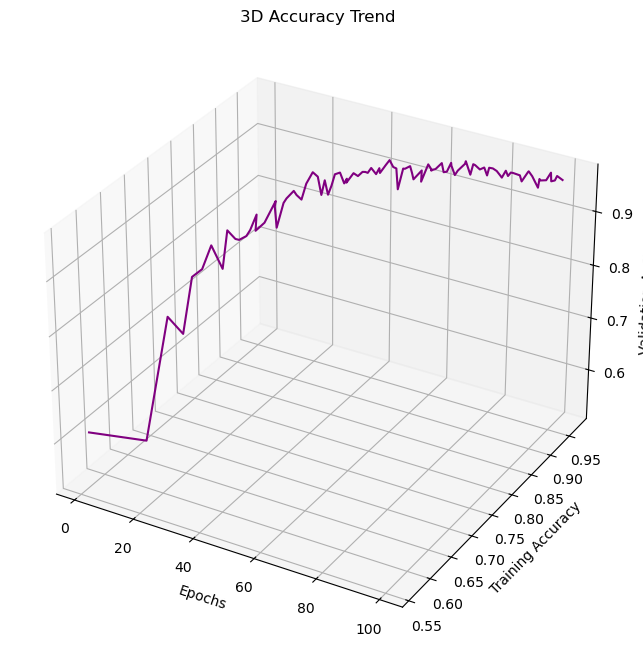

In [72]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(epochs, history.history['accuracy'], history.history['val_accuracy'], color='purple')
ax.set_title("3D Accuracy Trend")
ax.set_xlabel('Epochs')
ax.set_ylabel('Training Accuracy')
ax.set_zlabel('Validation Accuracy')
plt.show()


ANOVA F-Statistic: 163.0815
P-Value: 0.0000
✅ Significant Difference Between Tumor Classes


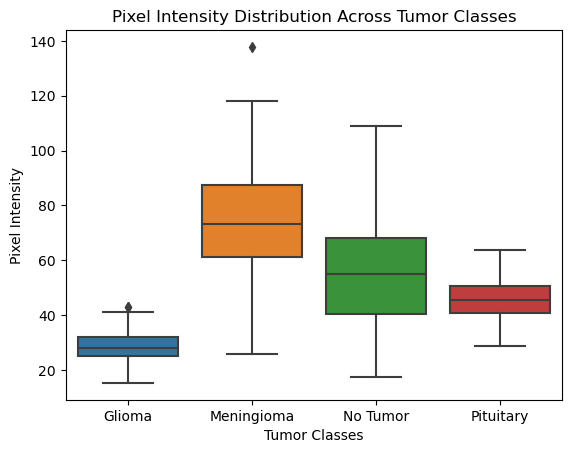

In [73]:
import pandas as pd
import cv2
import os
from scipy.stats import f_oneway
import seaborn as sns
import matplotlib.pyplot as plt

# Folder Paths
glioma_path = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Testing\\glioma"
meningioma_path = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Testing\\meningioma"
no_tumor_path = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Testing\\notumor"
pituitary_path = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Testing\\pituitary"

# Function to Get Mean Pixel Intensity
def get_pixel_intensity(folder):
    intensities = []
    for image_name in os.listdir(folder)[:100]:  # Taking 100 images from each class
        img = cv2.imread(os.path.join(folder, image_name), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            mean_intensity = img.mean()
            intensities.append(mean_intensity)
    return intensities

# Get Intensities for Each Class
glioma = get_pixel_intensity(glioma_path)
meningioma = get_pixel_intensity(meningioma_path)
no_tumor = get_pixel_intensity(no_tumor_path)
pituitary = get_pixel_intensity(pituitary_path)

# Perform ANOVA Test
stat, p_value = f_oneway(glioma, meningioma, no_tumor, pituitary)

print(f"ANOVA F-Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant Difference Between Tumor Classes")
else:
    print("❌ No Significant Difference Found")

# Box Plot for Visual Representation
data = {
    'Glioma': glioma,
    'Meningioma': meningioma,
    'No Tumor': no_tumor,
    'Pituitary': pituitary
}

df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data.items()]))
sns.boxplot(data=df)
plt.title("Pixel Intensity Distribution Across Tumor Classes")
plt.xlabel("Tumor Classes")
plt.ylabel("Pixel Intensity")
plt.show()


In [75]:
# Save Full Model
model.save("Brain_Tumor_Detection_Model.h5")
print("Model Saved Successfully ✅")


Model Saved Successfully ✅


In [77]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("Brain_Tumor_Detection_Model.h5")
print("Model Loaded Successfully ✅")


Model Loaded Successfully ✅


In [78]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (255, 255))           # Resize to model input size
    img = img / 255.0                           # Normalize pixel values
    img = np.expand_dims(img, axis=0)           # Add batch dimension
    return img


In [82]:
def detect_tumor(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Threshold to Highlight Tumor
    _, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Find Contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw Circle around Tumor
    for contour in contours:
        if cv2.contourArea(contour) > 1000:  # Ignore small areas
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            cv2.circle(img, center, radius, (0, 255, 0), 2)  # Green Circle

    return img


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


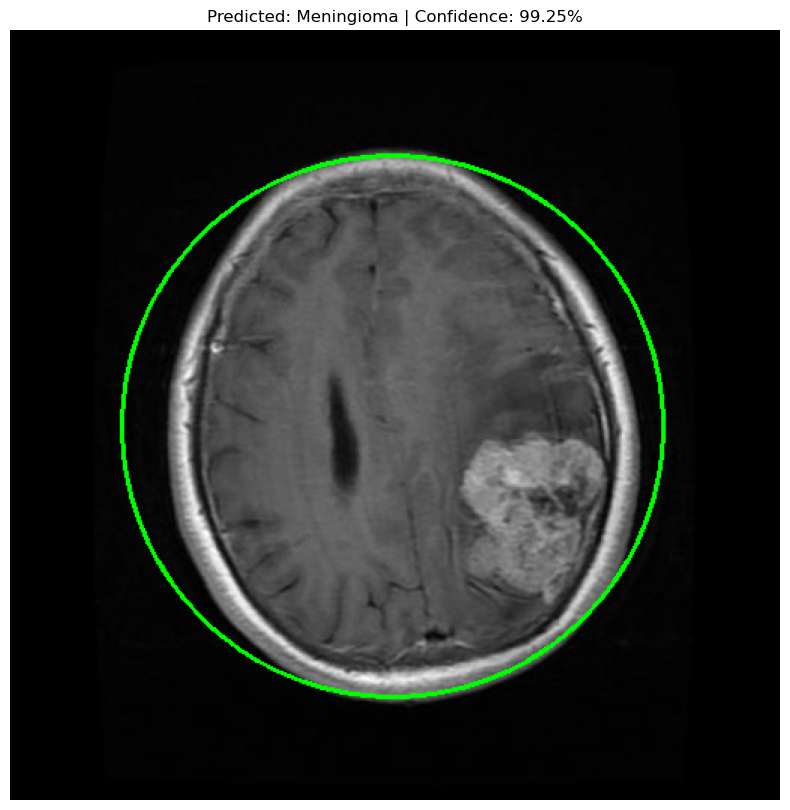

In [84]:
# Path to Image
image_path = "C:\\Users\\ujwal\\Downloads\\archive (15)\\Training\\meningioma\\Tr-me_1323.jpg"  # Replace with your path

# Preprocess Image
image = preprocess_image(image_path)

# Predict
prediction = model.predict(image)
classes = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary Tumor']
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)

# Detect Tumor and Draw Circle
detected_img = detect_tumor(image_path)

# Display Results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {classes[predicted_class]} | Confidence: {confidence * 100:.2f}%")
plt.axis("off")
plt.show()
